In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from linear_regression_gradient_descent import LinearRegression

### 需要注意的一点：  
· train_data[input_param_name].values  
· train_data[[input_param_name]].values  
上面：从DataFrame中选择一列返回一个Series对象，再转为Numpy数组，并且是一维数组  
下面：从DataFrame中选择一列返回一个DataFrame对象，再转为Numpy数组，是二维数组  

还可以通过 train_data[output_param_name].values.reshape(-1, 1) 也得到二维数组

In [2]:
data = pd.read_csv('./data/world-happiness-report-2017.csv')

# 得到训练和测试数据
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

input_param_name = 'Happiness.Score'
output_param_name = 'Economy..GDP.per.Capita.'

x_train = train_data[[input_param_name]].values
y_train = train_data[[output_param_name]].values
# y_train = train_data[output_param_name].values.reshape(-1, 1)

x_test = test_data[[input_param_name]].values
y_test = test_data[[output_param_name]].values

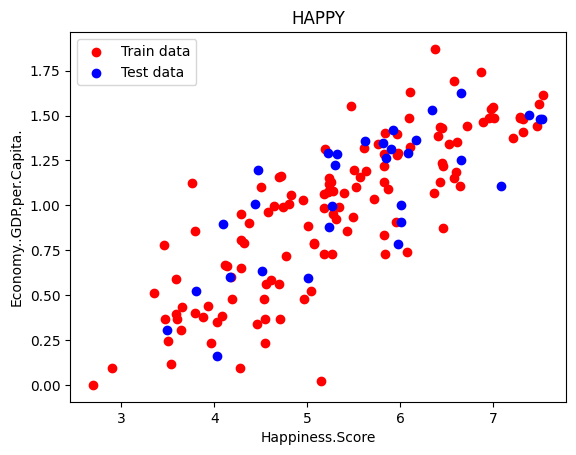

In [3]:
plt.scatter(x_train, y_train, c='r', label='Train data')
plt.scatter(x_test, y_test, c='b', label='Test data')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('HAPPY')
plt.legend()
plt.show()

In [4]:
num_iterations = 500
learning_rate = 0.01

# 这是一个类
linear_regression = LinearRegression(x_train, y_train)
theta, cost_history = linear_regression.train(learning_rate, num_iterations)
print('开始的损失：', cost_history[0])
print('训练后的损失：', cost_history[-1])

开始的损失： 0.5413776461063663
训练后的损失： 0.029856974008582907


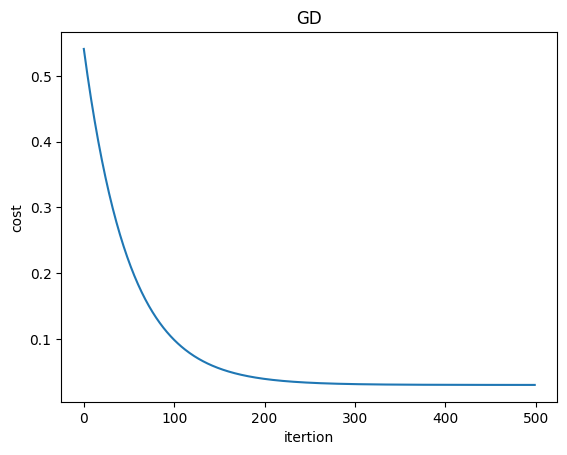

In [5]:
plt.plot(range(num_iterations), cost_history)
plt.xlabel('itertion')
plt.ylabel('cost')
plt.title('GD')
plt.show()

#### 做测试

In [10]:
predictions_num = 100
x_predictions = np.linspace(x_train.min(), x_train.max(), predictions_num).reshape(-1, 1)
y_predictions = linear_regression.predict(x_predictions)

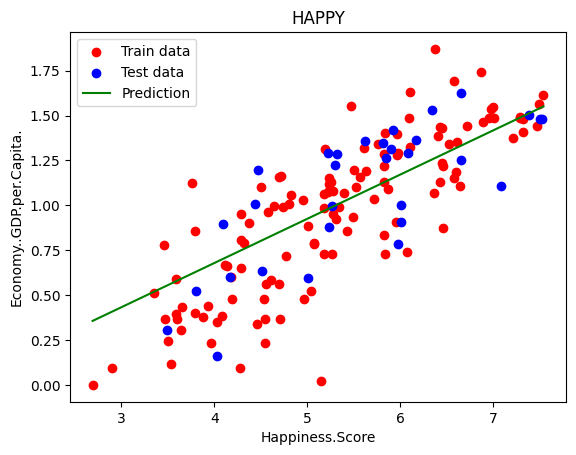

In [11]:
plt.scatter(x_train, y_train, c='r', label='Train data')
plt.scatter(x_test, y_test, c='b', label='Test data')
plt.plot(x_predictions, y_predictions, c='g', label='Prediction')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('HAPPY')
plt.legend()
plt.show()